# Example: Two-Way ANOVA, Weight Loss

Suppose we want to determine if exercise intensity and gender impact weight loss.

Two factors: 
* exercise (no exercise, light exercise, or intense exercise)
* gender (male, female)

Response variable: 
* weight loss (measured in pounds)

We recruit 30 men and 30 women to participate in an experiment in which we randomly
assign 10 of each to follow a program of either no exercise, light exercise, or intense
exercise for one month.

We can conduct a two-way ANOVA to determine if exercise and gender impact weight
loss and to determine if there is an interaction between exercise and gender on weight
loss.

* Start by creating the dataframe and ONLY display the first 6 rows of the dataset:

In [1]:
gender = rep(c("Male", "Female"), each = 30)
exercise = rep(c("None", "Light", "Intense"), each = 10, times = 2)
weight_loss =c(0.11, 0.65, -0.71, -1.54, 1.24, -2.32, -2.92, -2.37, 2.10, 2.31, 4.30, 2.43,
3.26, 4.71, 0.36, 3.26, 0.50, 1.58, 1.71, 4.88, 8.27, 6.70, 7.88, 7.51, 6.57, 5.43, 5.13,
7.25, 6.24, 7.16, -1.56, -3.16, -2.86, 0.10, 1.24, 1.90, 1.82, 0.30, -1.26, 1.42, 1.87, 0.78,
2.70, 2.18, 1.34, 1.90, 1.66, 1.35, 0.18, 2.55, 6.11, 7.26, 6.55, 4.77, 4.29, 3.62, 7.34,
7.98, 6.86, 6.98)
data= data.frame(gender, exercise, weight_loss)

head(data, 6)

,gender,exercise,weight_loss
,<chr>,<chr>,<dbl>
1,Male,None,0.11
2,Male,None,0.65
3,Male,None,-0.71
4,Male,None,-1.54
5,Male,None,1.24
6,Male,None,-2.32


* Use the `struct()` function to get information about the dataset:

In [2]:
str(data)

'data.frame':	60 obs. of  3 variables:
 $ gender     : chr  "Male" "Male" "Male" "Male" ...
 $ exercise   : chr  "None" "None" "None" "None" ...
 $ weight_loss: num  0.11 0.65 -0.71 -1.54 1.24 -2.32 -2.92 -2.37 2.1 2.31 ...


* Create a boxplot for each treatment groups to viz distribution of weight loss for each group

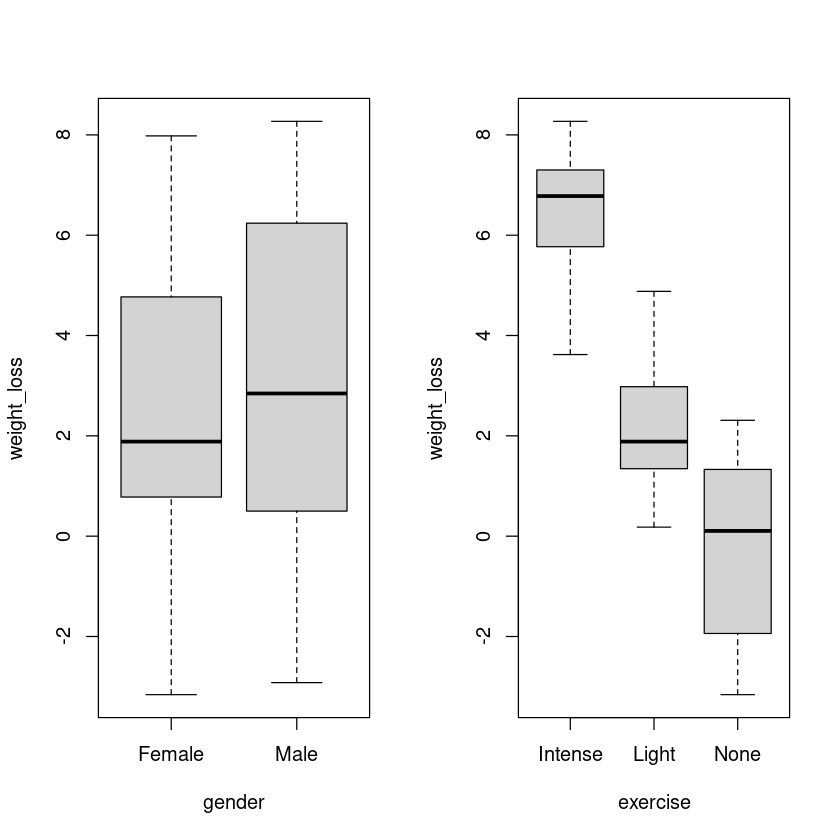

In [3]:
par(mfrow=c(1,2))
boxplot(weight_loss~gender, data=data)
boxplot(weight_loss~exercise, data=data)

* You can also create more boxplots with the follwing:

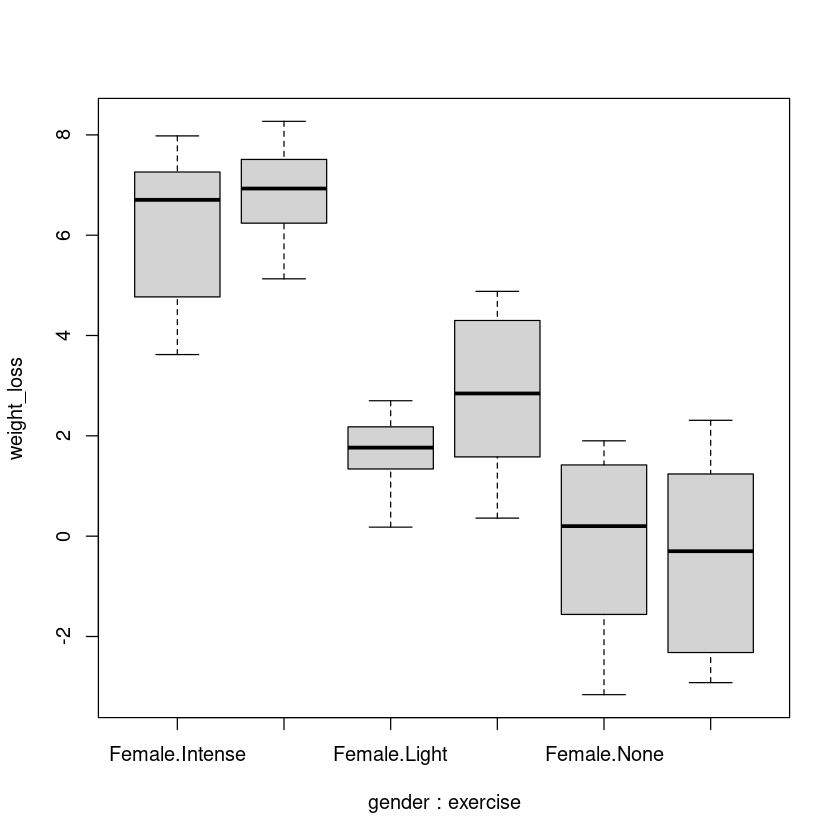

In [4]:
boxplot(weight_loss~gender:exercise, data=data)

* Now fit the two way ANOVA model and view the output

In [6]:
model = aov(weight_loss~gender*exercise, data=data)
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
gender,1,3.988682,3.988682,1.7427330,1.923616e-01
exercise,2,470.046803,235.023402,102.6863164,3.968985e-19
gender:exercise,2,3.634663,1.817332,0.7940277,4.572266e-01
Residuals,54,123.592550,2.288751,NA,NA


* We also have a simple model with no interaction, so we can do the above with just `+` instead of `*`:

In [7]:
mode2 = aov(weight_loss~gender+exercise, data=data)
anova(mode2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
gender,1,3.988682,3.988682,1.755648,1.905495e-01
exercise,2,470.046803,235.023402,103.447290,1.568119e-19
Residuals,56,127.227213,2.271915,NA,NA


* Generate an interaction plot for this dataset:

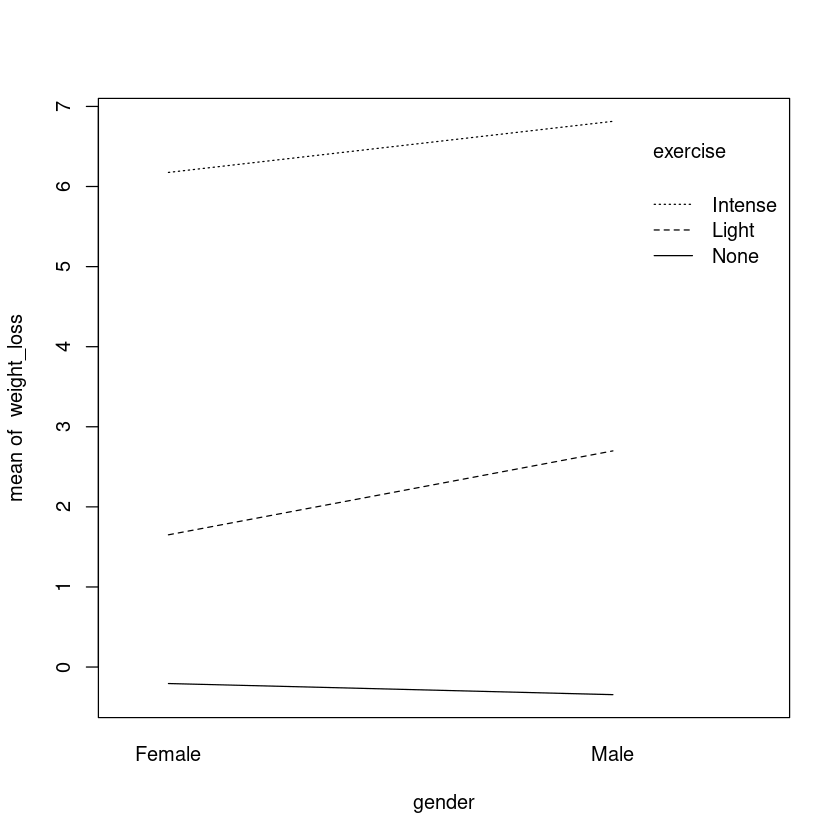

In [9]:
with(data, {interaction.plot(gender, exercise, weight_loss)})

* Create a confidence interval for ecah comparison (one for gender and one for exercise)

In [10]:
library(emmeans)
emmeans(mode2, "gender")

 gender emmean    SE df lower.CL upper.CL
 Female   2.54 0.275 56     1.99     3.09
 Male     3.06 0.275 56     2.50     3.61

Results are averaged over the levels of: exercise 
Confidence level used: 0.95 

In [11]:
emmeans(mode2, "exercise")

 exercise emmean    SE df lower.CL upper.CL
 Intense   6.495 0.337 56    5.820     7.17
 Light     2.175 0.337 56    1.500     2.85
 None     -0.276 0.337 56   -0.951     0.40

Results are averaged over the levels of: gender 
Confidence level used: 0.95 